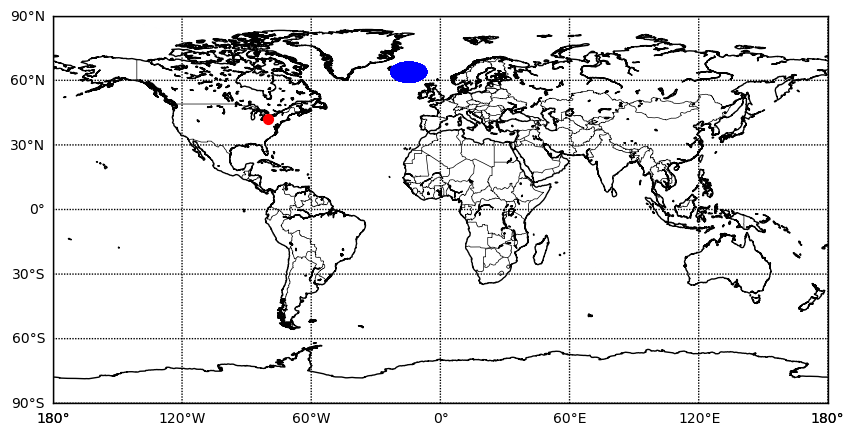

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap

# 创建画布
fig, ax = plt.subplots(figsize=(10, 8))

# 初始化地图（这里是全球范围，投影可改）
m = Basemap(projection='cyl',  # 等经纬矩形投影
            llcrnrlat=-90, urcrnrlat=90,  # 纬度范围
            llcrnrlon=-180, urcrnrlon=180,  # 经度范围
            resolution='l', ax=ax)

# 画基础地图元素
m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(-90, 91, 30), labels=[1, 0, 0, 0])  # 纬度刻度
m.drawmeridians(range(-180, 181, 60), labels=[0, 0, 0, 1])  # 经度刻度
m.drawmapboundary()

# ====== 这里根据经纬度打点 ======

# 台站
lats = [42.12]  # 纬度
lons = [-79.99000000000001]  # 经度
x, y = m(lons, lats)
m.scatter(x, y, color='red', marker='o', s=50, zorder=5)

# ULVZ
data = np.loadtxt("reciprocal_simulations/US.ERP/input/reciprocal_stations_solid.txt", dtype=str)
lats = data[:, 2].astype(float)
lons = data[:, 3].astype(float)
lons[lons > 180] = lons[lons > 180] - 360
x, y = m(lons, lats)
m.scatter(x, y, color='blue', marker='o', s=20, zorder=5)
plt.show()


(4800, 3, 2003)


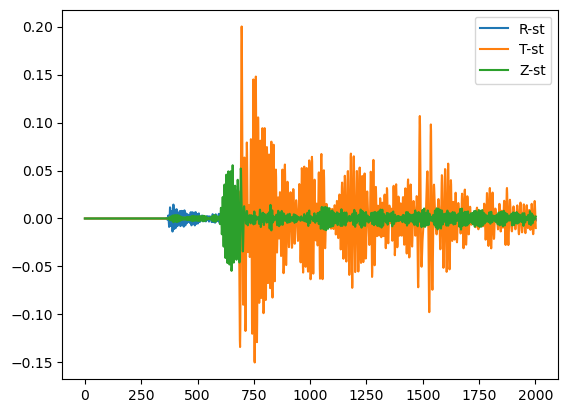

In [2]:
ds = xr.open_dataset("reciprocal_simulations/US.ERP/output/stations/solid/axisem3d_synthetics.nc.rank0")
print(ds["data_wave"].shape)
plt.plot(ds["data_wave"][0, 0, :], label="R-st")
plt.plot(ds["data_wave"][0, 1, :], label="T-st")
plt.plot(ds["data_wave"][0, 2, :], label="Z-st")
plt.legend()
plt.show()

(2003, 3, 4800)


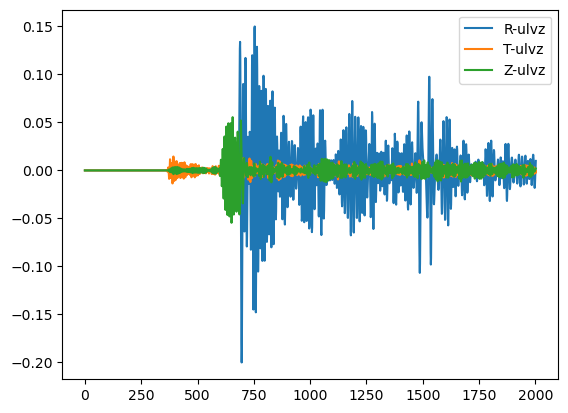

In [3]:
rotate = np.load("reciprocal_simulations/US.ERP/output/rotated_solid.npz")["arr_0"]
print(rotate.shape)
plt.plot(rotate[:, 0, 0], label="R-ulvz")
plt.plot(rotate[:, 1, 0], label="T-ulvz")
plt.plot(rotate[:, 2, 0], label="Z-ulvz")
plt.legend()
plt.show()